In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.transform import resize
import matplotlib.image as img

2025-03-20 23:08:26.392869: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742512106.411951  328421 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742512106.416400  328421 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-20 23:08:26.437652: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


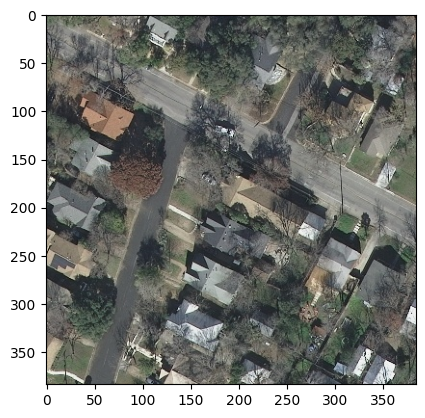

In [2]:
test_image = cv2.imread('./AerialImageDataset/train_384x384/images/austin20_1_1.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = resize(test_image,(384,384,3))
plt.imshow(test_image, cmap='gray')
plt.show()

In [3]:
model_path = 'model_cp_att_2.keras'
model = tf.keras.models.load_model(model_path)

I0000 00:00:1742512108.826133  328421 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5145 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:0a:00.0, compute capability: 8.9


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


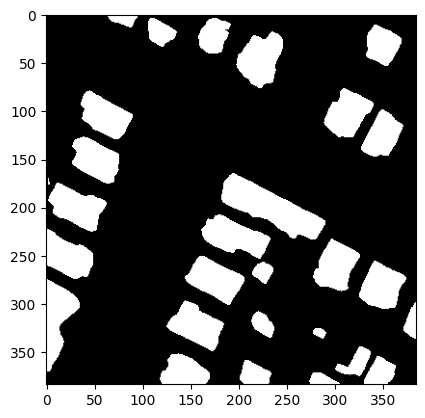

In [48]:
mask = model.predict(np.expand_dims(test_image, 0))
mask= mask.reshape(384,384)*255
plt.imshow(mask, cmap='gray')
ret, pred1 = cv2.threshold(mask, 125, 255, cv2.THRESH_BINARY)
plt.imshow(pred1, cmap='gray')
    

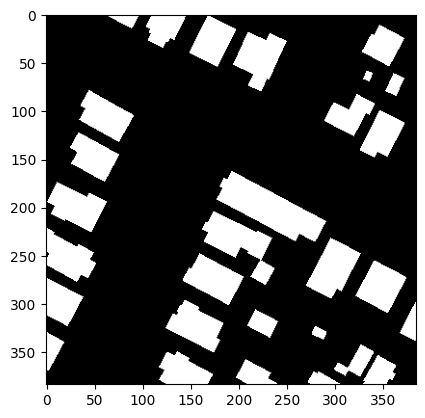

In [6]:
from skimage.color import rgb2gray
gt = cv2.imread('./AerialImageDataset/train_384x384/gt/austin20_1_1.png')
gt = resize(gt,(384,384,3))

gt = rgb2gray(gt)
plt.imshow(gt, cmap='gray')
plt.show()

In [49]:
intersection = np.logical_and(gt, pred1)
union = np.logical_or(gt, pred1)
iou_score = np.sum(intersection) / np.sum(union)

In [50]:
iou_score

np.float64(0.8373936420830909)

Total Pixel Area: 30685.5


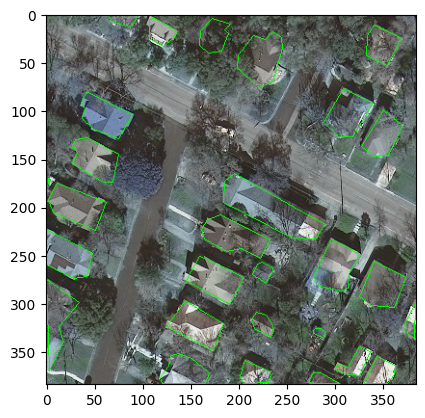

In [51]:
# Load the binary mask image
binary_mask = pred1
area_list = []

# Check if the binary mask image is loaded correctly
if binary_mask is None:
    raise ValueError("Binary mask image not found at the specified path.")

# Convert binary mask to CV_8UC1 format
binary_mask = (binary_mask * 255).astype(np.uint8)

# Find contours of the white pixels
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Load the original image (assuming the same size as the binary mask)
original_image_path ='./AerialImageDataset/train_384x384/images/austin20_1_1.jpg'
original_image = cv2.imread(original_image_path)
# original_image = resize(original_image,(384,384,3))

# Check if the original image is loaded correctly
if original_image is None:
    raise ValueError("Original image not found at the specified path.") 

# Ensure the original image is in the correct format for display
if len(original_image.shape) == 2:
    original_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)

# Draw polygons around the detected contours and calculate areas
for contour in contours:
    # Approximate the contour to reduce the number of points
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    cv2.drawContours(original_image, [approx], -1, (0, 255, 0), 1)
    
    # Calculate the area in pixel units
    pixel_area = cv2.contourArea(contour)
    area_list.append(pixel_area)

    
    # Print or store the area values as needed
    # print(f"Pixel Area: {pixel_area}")
print(f"Total Pixel Area: {sum(area_list)}")
# Save the image with traced rooftops
# output_path = '_output_image.png'
# cv2.imwrite(output_path, original_image)

# Optionally, display the image with traced rooftops
# cv2.imshow('Detected Rooftops', original_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(original_image, cmap='gray')
plt.show()


Rooftop Orientation: 90.00 degrees
Rooftop Orientation: 15.26 degrees
Rooftop Orientation: 26.57 degrees
Rooftop Orientation: 0.00 degrees
Rooftop Orientation: 26.57 degrees
Rooftop Orientation: 26.57 degrees
Rooftop Orientation: 32.01 degrees
Rooftop Orientation: 90.00 degrees
Rooftop Orientation: 26.57 degrees
Rooftop Orientation: 0.00 degrees
Rooftop Orientation: 30.96 degrees
Rooftop Orientation: 25.02 degrees
Rooftop Orientation: 28.44 degrees
Rooftop Orientation: 22.62 degrees
Rooftop Orientation: 25.28 degrees
Rooftop Orientation: 24.10 degrees
Rooftop Orientation: 23.20 degrees
Rooftop Orientation: 0.00 degrees
Rooftop Orientation: 27.26 degrees
Rooftop Orientation: 27.55 degrees
Rooftop Orientation: 26.57 degrees
Rooftop Orientation: 29.36 degrees
Rooftop Orientation: 34.22 degrees
Rooftop Orientation: 15.95 degrees
Rooftop Orientation: 25.02 degrees
Rooftop Orientation: 21.80 degrees
Rooftop Orientation: 29.05 degrees
Rooftop Orientation: 90.00 degrees


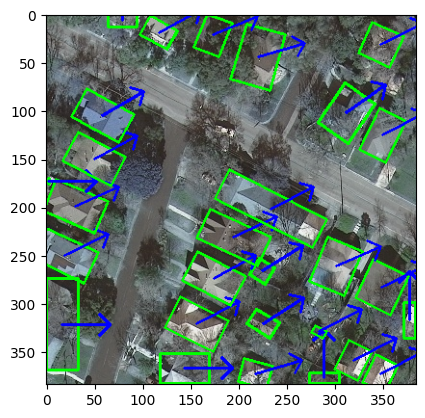

In [52]:
import cv2
import numpy as np
import math

# Load the binary mask image
binary_mask = pred1

# Check if the binary mask image is loaded correctly
if binary_mask is None:
    raise ValueError("Binary mask image not found at the specified path.")

# Convert binary mask to CV_8UC1 format
binary_mask = (binary_mask * 255).astype(np.uint8)

# Find contours of the white pixels
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Load the original image (assuming the same size as the binary mask)
original_image_path = 'AerialImageDataset/train_384x384/images/austin20_1_1.jpg'
original_image = cv2.imread(original_image_path)

# Check if the original image is loaded correctly
if original_image is None:
    raise ValueError("Original image not found at the specified path.")

# Ensure the original image is in the correct format for display
if len(original_image.shape) == 2:
    original_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)

# Process each contour to calculate orientation and draw bounding boxes with axes
for contour in contours:
    # Get the minimum area bounding rectangle
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = box.astype(np.int32)


    # Draw the bounding box
    cv2.drawContours(original_image, [box], 0, (0, 255, 0), 2)

    # Calculate the center, size, and angle of the rectangle
    center = (int(rect[0][0]), int(rect[0][1]))
    angle = rect[-1]

    # Adjust the angle to a northward reference
    if angle < -45:
        adjusted_angle = angle + 90
    else:
        adjusted_angle = angle

    # Print the adjusted angle
    print(f"Rooftop Orientation: {adjusted_angle:.2f} degrees")

    # Draw the axis
    length = 50  # Length of the axis line for visualization
    radians = math.radians(-adjusted_angle)  # Convert to radians and invert for correct direction

    # Calculate endpoint of the axis line
    x_end = int(center[0] + length * math.cos(radians))
    y_end = int(center[1] + length * math.sin(radians))

    # Draw the northward axis line
    cv2.arrowedLine(original_image, center, (x_end, y_end), (0, 0, 255), 2, tipLength=0.3)

# Save the image with rooftop bounding boxes and orientation axes
# output_path = '_output_image_with_orientation_and_axes.png'
# cv2.imwrite(output_path, original_image)

# Optionally, display the image
# cv2.imshow('Detected Rooftops with Orientation and Axes', original_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(original_image, cmap='gray')
plt.show()


Rooftop Area Receiving Sunlight: 217.0 pixels
Sunlight Intensity: 0
Rooftop Area Receiving Sunlight: 549.5 pixels
Sunlight Intensity: 178.72439861297607
Rooftop Area Receiving Sunlight: 611.5 pixels
Sunlight Intensity: 122.17474937438965
Rooftop Area Receiving Sunlight: 1128.5 pixels
Sunlight Intensity: 255.0
Rooftop Area Receiving Sunlight: 505.0 pixels
Sunlight Intensity: 122.17474937438965
Rooftop Area Receiving Sunlight: 89.0 pixels
Sunlight Intensity: 122.17474937438965
Rooftop Area Receiving Sunlight: 380.0 pixels
Sunlight Intensity: 94.97306823730469
Rooftop Area Receiving Sunlight: 264.5 pixels
Sunlight Intensity: 0
Rooftop Area Receiving Sunlight: 1634.5 pixels
Sunlight Intensity: 122.17474937438965
Rooftop Area Receiving Sunlight: 1689.0 pixels
Sunlight Intensity: 255.0
Rooftop Area Receiving Sunlight: 299.5 pixels
Sunlight Intensity: 100.18122673034668
Rooftop Area Receiving Sunlight: 1525.5 pixels
Sunlight Intensity: 129.91552352905273
Rooftop Area Receiving Sunlight: 1689.

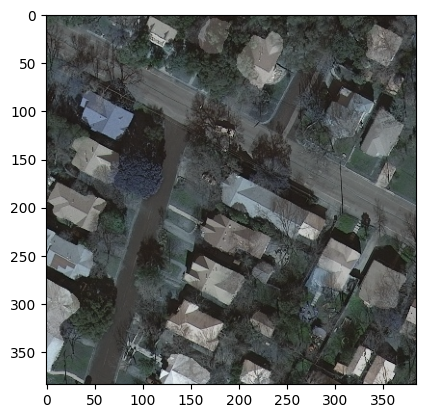

In [53]:
import cv2
import numpy as np
import math

# Load the binary mask image
binary_mask = pred1

# Convert binary mask to CV_8UC1 format
binary_mask = (binary_mask * 255).astype(np.uint8)

# Find contours of the rooftops
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Load the original image (assuming the same size as the binary mask)
original_image_path = 'AerialImageDataset/train_384x384/images/austin20_1_1.jpg'
original_image = cv2.imread(original_image_path)

# Initialize an empty mask for shading areas
sunlight_mask = np.zeros_like(original_image)

# Process each rooftop contour
for contour in contours:
    # Get the minimum area bounding rectangle
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int32(box)

    # Get the angle of sunlight (assuming it's from the north)
    sunlight_angle = 0  # Sunlight direction is north (0 degrees)

    # Calculate the orientation of the rooftop
    roof_angle = rect[2]
    if roof_angle < -45:
        roof_angle += 90

    # Determine sunlight intensity based on the angle difference
    angle_diff = abs(sunlight_angle - roof_angle)
    sunlight_intensity = max(0, 255 - angle_diff * 5)  # Scale intensity based on angle

    # Shade the rooftop area based on sunlight intensity
    cv2.drawContours(sunlight_mask, [contour], -1, (sunlight_intensity, sunlight_intensity, sunlight_intensity), -1)

    # Calculate pixel area of the shaded rooftop
    pixel_area = cv2.contourArea(contour)
    print(f"Rooftop Area Receiving Sunlight: {pixel_area} pixels")
    print(f"Sunlight Intensity: {sunlight_intensity}")

# Combine the original image with the sunlight mask
result_image = cv2.addWeighted(original_image, 0.7, sunlight_mask, 0.3, 0)

# Save the result image
# output_path = '_output_image_with_sunlight_shading.png'
# cv2.imwrite(output_path, result_image)

# Optionally, display the image
# cv2.imshow('Rooftops with Sunlight Shading', result_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(result_image, cmap='gray')
plt.show()


Rooftop Stats - Total Area: 252, North-Facing Area: 75, Non-North-Facing Area: 177
Rooftop Stats - Total Area: 594, North-Facing Area: 256, Non-North-Facing Area: 338
Rooftop Stats - Total Area: 658, North-Facing Area: 361, Non-North-Facing Area: 297
Rooftop Stats - Total Area: 1193, North-Facing Area: 555, Non-North-Facing Area: 638
Rooftop Stats - Total Area: 555, North-Facing Area: 315, Non-North-Facing Area: 240
Rooftop Stats - Total Area: 106, North-Facing Area: 52, Non-North-Facing Area: 54
Rooftop Stats - Total Area: 415, North-Facing Area: 190, Non-North-Facing Area: 225
Rooftop Stats - Total Area: 305, North-Facing Area: 111, Non-North-Facing Area: 194
Rooftop Stats - Total Area: 1710, North-Facing Area: 819, Non-North-Facing Area: 891
Rooftop Stats - Total Area: 1793, North-Facing Area: 423, Non-North-Facing Area: 1370
Rooftop Stats - Total Area: 329, North-Facing Area: 160, Non-North-Facing Area: 169
Rooftop Stats - Total Area: 1595, North-Facing Area: 825, Non-North-Facing 

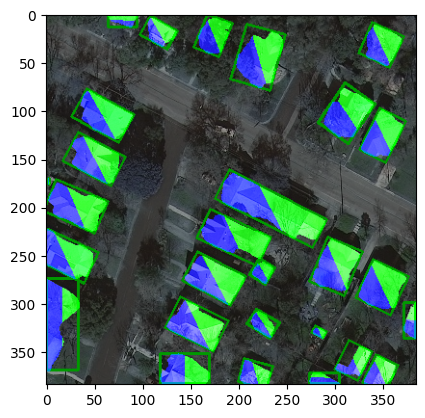

In [54]:
import cv2
import numpy as np
import math

# Load the binary mask image
binary_mask = pred1

# Check if the binary mask image is loaded correctly
if binary_mask is None:
    raise ValueError("Binary mask image not found at the specified path.")

# Convert binary mask to CV_8UC1 format
binary_mask = (binary_mask * 255).astype(np.uint8)

# Find contours of the rooftops
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Load the original image (assuming the same size as the binary mask)
original_image_path = 'AerialImageDataset/train_384x384/images/austin20_1_1.jpg'
original_image = cv2.imread(original_image_path)

# Check if the original image is loaded correctly
if original_image is None:
    raise ValueError("Original image not found at the specified path.")

# Ensure the original image and sunlight mask have the same dimensions
height, width, channels = original_image.shape
sunlight_mask = np.zeros((height, width, 3), dtype=np.uint8)  # Create a 3-channel mask for shading

# Initialize area counters
rooftop_stats = []

# Process each rooftop contour
for contour in contours:
    # Get the minimum area bounding rectangle
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int32(box)

    # Draw the bounding box on the original image
    cv2.drawContours(original_image, [box], 0, (0, 255, 0), 2)

    # Calculate the center and angle of the building
    roof_angle = rect[2]
    if roof_angle < -45:
        roof_angle += 90
    center = (int(rect[0][0]), int(rect[0][1]))

    # Define the north-facing vector based on the building's orientation
    radians = math.radians(-roof_angle)
    north_vector = np.array([math.cos(radians), math.sin(radians)])

    # Create a binary mask of the rooftop
    mask = np.zeros(binary_mask.shape, dtype=np.uint8)
    cv2.drawContours(mask, [contour], -1, 255, -1)

    # Initialize areas
    total_area = 0
    north_facing_area = 0
    non_north_facing_area = 0

    # Iterate over each pixel within the contour
    for y in range(height):
        for x in range(width):
            if mask[y, x] == 255:  # Pixel belongs to the rooftop
                total_area += 1  # Count total area

                # Calculate the vector from the center to the pixel
                pixel_vector = np.array([x - center[0], y - center[1]])
                dot_product = np.dot(pixel_vector, north_vector)

                # Classify the pixel as north-facing or non-north-facing
                if dot_product > 0:
                    north_facing_area += 1
                    sunlight_mask[y, x] = (0, 255, 0)  # Green for north-facing
                else:
                    non_north_facing_area += 1
                    sunlight_mask[y, x] = (0, 0, 255)  # Red for non-north-facing

    # Store the rooftop statistics
    rooftop_stats.append({
        "total_area": total_area,
        "north_facing_area": north_facing_area,
        "non_north_facing_area": non_north_facing_area
    })

    # Print the areas for the current rooftop
    print(f"Rooftop Stats - Total Area: {total_area}, North-Facing Area: {north_facing_area}, Non-North-Facing Area: {non_north_facing_area}")

# Combine the original image with the sunlight mask
result_image = cv2.addWeighted(original_image, 0.6, sunlight_mask, 0.8, 0)


# Save the result image
# output_path = '_output_image_with_sunlight_shading_and_slopes.png'
# cv2.imwrite(output_path, result_image)

# Optionally, display the image
# cv2.imshow('Rooftops with Sunlight Shading and Slopes', result_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()




plt.imshow(result_image, cmap='gray')
plt.show()


Rooftop - North Panels: 0, Power: 0.00 W
Rooftop - South Panels: 0, Power: 0.00 W
Rooftop - North Panels: 0, Power: 0.00 W
Rooftop - South Panels: 0, Power: 0.00 W
Rooftop - North Panels: 0, Power: 0.00 W
Rooftop - South Panels: 0, Power: 0.00 W
Rooftop - North Panels: 0, Power: 0.00 W
Rooftop - South Panels: 0, Power: 0.00 W
Rooftop - North Panels: 0, Power: 0.00 W
Rooftop - South Panels: 0, Power: 0.00 W
Rooftop - North Panels: 0, Power: 0.00 W
Rooftop - South Panels: 0, Power: 0.00 W
Rooftop - North Panels: 0, Power: 0.00 W
Rooftop - South Panels: 0, Power: 0.00 W
Rooftop - North Panels: 0, Power: 0.00 W
Rooftop - South Panels: 0, Power: 0.00 W
Rooftop - North Panels: 0, Power: 0.00 W
Rooftop - South Panels: 0, Power: 0.00 W
Rooftop - North Panels: 0, Power: 0.00 W
Rooftop - South Panels: 1, Power: 150.00 W
Rooftop - North Panels: 0, Power: 0.00 W
Rooftop - South Panels: 0, Power: 0.00 W
Rooftop - North Panels: 0, Power: 0.00 W
Rooftop - South Panels: 0, Power: 0.00 W
Rooftop - Nort

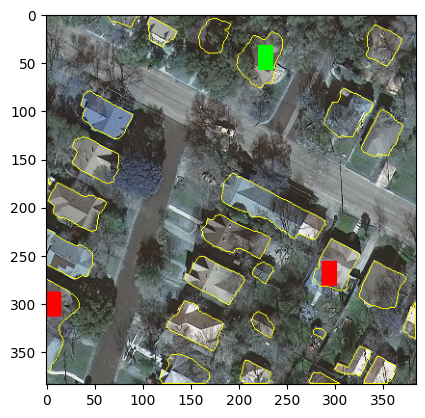

In [ ]:
import cv2
import numpy as np
import math

# Constants
SOLAR_PANEL_LENGTH = 1.7  # Length of a solar panel in meters
SOLAR_PANEL_WIDTH = 1.0  # Width of a solar panel in meters
MIN_SPACING = 0.5  # Minimum spacing between panels in meters
PANEL_POWER_OUTPUT = 300  # Power output of a single panel in watts under full sunlight
PIXEL_TO_M = 0.25  # Conversion factor: each pixel represents 0.25 meters

# Convert solar panel dimensions and spacing to pixels
panel_length_px = int(SOLAR_PANEL_LENGTH / PIXEL_TO_M)
panel_width_px = int(SOLAR_PANEL_WIDTH / PIXEL_TO_M)
spacing_px = int(MIN_SPACING / PIXEL_TO_M)

# Load the binary mask image
binary_mask = pred1

# Check if the binary mask image is loaded correctly
if binary_mask is None:
    raise ValueError("Binary mask image not found at the specified path.")

# Convert binary mask to CV_8UC1 format
binary_mask = (binary_mask * 255).astype(np.uint8)

# Find contours of the rooftops
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Load the original image (assuming the same size as the binary mask)
original_image_path = 'AerialImageDataset/train_384x384/images/austin20_1_1.jpg'
original_image = cv2.imread(original_image_path)

# Check if the original image is loaded correctly
if original_image is None:
    raise ValueError("Original image not found at the specified path.")

# Ensure the original image and sunlight mask have the same dimensions
height, width, channels = original_image.shape
panel_layout = original_image.copy()  # Create a copy of the image for panel visualization

# Rooftop statistics collection
rooftop_stats = []

# Process each rooftop contour
for contour in contours:
    # Draw the original contour for the rooftop
    cv2.drawContours(panel_layout, [contour], -1, (255, 255, 0), 1)  # Yellow to represent the original contour

    # Get the minimum area bounding rectangle
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int32(box)

    # Draw the bounding box on the original image
    # cv2.drawContours(panel_layout, [box], 0, (0, 255, 0), 2)  # Green to represent the bounding box

    # Calculate the center, width, height, and angle of the rooftop
    roof_angle = rect[2]
    if roof_angle < -45:
        roof_angle += 90
    center = (int(rect[0][0]), int(rect[0][1]))

    # Define the north-facing and south-facing vectors
    radians = math.radians(-roof_angle)
    north_vector = np.array([math.cos(radians), math.sin(radians)])
    south_vector = -north_vector  # Opposite to north-facing vector

    # Create a binary mask of the rooftop
    mask = np.zeros(binary_mask.shape, dtype=np.uint8)
    cv2.drawContours(mask, [contour], -1, 255, -1)

    # Initialize panel placement counts
    north_facing_panels = 0
    south_facing_panels = 0
    north_power = 0
    south_power = 0

    # Iterate over each pixel in the rooftop mask for solar panel placement
    for row in range(0, mask.shape[0] - panel_length_px, panel_length_px + spacing_px):
        for col in range(0, mask.shape[1] - panel_width_px, panel_width_px + spacing_px):
            # Define the rectangle representing a solar panel
            panel_rect = [
                (col, row),
                (col + panel_width_px, row),
                (col + panel_width_px, row + panel_length_px),
                (col, row + panel_length_px)
            ]

            # Check if the panel is entirely within the rooftop mask
            panel_mask = np.zeros_like(mask)
            cv2.fillPoly(panel_mask, [np.array(panel_rect, np.int32)], 255)
            overlap = cv2.bitwise_and(panel_mask, mask)
            if np.sum(overlap) == np.sum(panel_mask):  # Panel is fully within the mask
                # Determine which slope the panel belongs to
                panel_center = ((panel_rect[0][0] + panel_rect[2][0]) // 2,
                                (panel_rect[0][1] + panel_rect[2][1]) // 2)
                vector_to_center = np.array([panel_center[0] - center[0], panel_center[1] - center[1]])
                dot_north = np.dot(vector_to_center, north_vector)

                if dot_north > 0:  # North-facing
                    cv2.fillPoly(panel_layout, [np.array(panel_rect, np.int32)], (0, 255, 0))  # Green for north-facing
                    north_facing_panels += 1
                else:  # South-facing
                    cv2.fillPoly(panel_layout, [np.array(panel_rect, np.int32)], (255, 0, 0))  # Red for south-facing
                    south_facing_panels += 1

    # Calculate power generation for north and south-facing panels
    north_power = north_facing_panels * PANEL_POWER_OUTPUT  # Full sunlight intensity for north-facing panels
    south_power = south_facing_panels * PANEL_POWER_OUTPUT / 2  # Reduced intensity for south-facing panels

    # Store the rooftop statistics
    rooftop_stats.append({
        "north_panels": north_facing_panels,
        "south_panels": south_facing_panels,
        "north_power_watts": north_power,
        "south_power_watts": south_power
    })

    # Print the statistics for the current rooftop
    print(f"Rooftop - North Panels: {north_facing_panels}, Power: {north_power:.2f} W")
    print(f"Rooftop - South Panels: {south_facing_panels}, Power: {south_power:.2f} W")

# Save the panel layout image
# output_path = '_output_image_with_panel_simulation_no_slope.png'
# cv2.imwrite(output_path, panel_layout)

# Optionally, display the image
# cv2.imshow('Solar Panel Layout with Rooftop Contours', panel_layout)
# cv2.waitKey(0)
# cv2.destroyAllWindows()





plt.imshow(panel_layout, cmap='gray')
plt.show()

In [10]:
image_path = 'AerialImageDataset/train_384x384/images/austin20_1_1.jpg'

In [11]:
def create_aggregated_mask_and_bounding_boxes(binary_mask, kernel_size):
    # Save the initial binary mask
    cv2.imwrite('binary_mask.png', binary_mask)

    # Create a kernel for morphological operations
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Apply morphological closing operation to fill small holes and aggregate mask
    aggregated_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
    cv2.imwrite('aggregated_mask_after_closing.png', aggregated_mask)

    # Apply morphological erosion to remove noise
    aggregated_mask = cv2.erode(aggregated_mask, kernel, iterations=1)
    cv2.imwrite('aggregated_mask_after_erosion.png', aggregated_mask)

    # Apply morphological dilation to enhance object boundaries
    aggregated_mask = cv2.dilate(aggregated_mask, kernel, iterations=1)
    cv2.imwrite('aggregated_mask_after_dilation.png', aggregated_mask)

    # Find contours in the aggregated mask
    contours, _ = cv2.findContours(aggregated_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty mask to draw the bounding boxes
    bounding_box_mask = np.zeros_like(aggregated_mask)

    # Draw bounding boxes around each contour
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(bounding_box_mask, (x, y), (x + w, y + h), 255, 2)

    cv2.imwrite('bounding_box_mask.png', bounding_box_mask)

    return bounding_box_mask

# Ensure mask is of type uint8
mask = mask.astype(np.uint8)

# Create the aggregated mask and draw bounding boxes
kernel_size = 5

bounding_box_mask = create_aggregated_mask_and_bounding_boxes(mask, kernel_size)
cv2.imwrite('final_bounding_box_mask.png', bounding_box_mask)


True

MAPS API

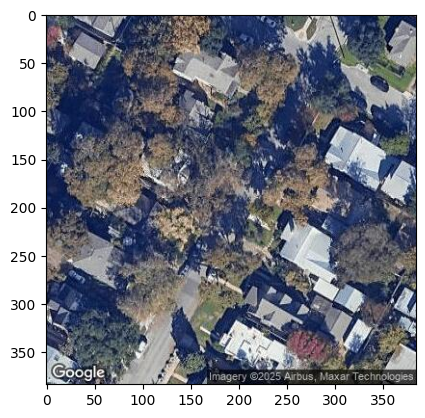

In [78]:
maps_image = cv2.imread('map_image.jpg')
maps_image = cv2.cvtColor(maps_image, cv2.COLOR_BGR2RGB)
maps_image = resize(maps_image,(384,384,3))
plt.imshow(maps_image, cmap='gray')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


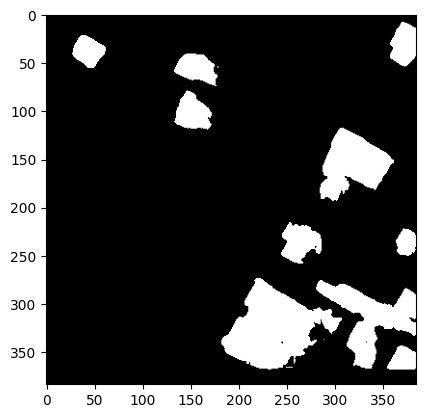

In [79]:
maps_mask = model.predict(np.expand_dims(maps_image, 0))
maps_mask= maps_mask.reshape(384,384)*255
plt.imshow(maps_mask, cmap='gray')
ret, pred = cv2.threshold(maps_mask, 125, 255, cv2.THRESH_BINARY)
plt.imshow(pred, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Pixel Area: 0
Pixel Area: 35
Pixel Area: 0
Pixel Area: 238
Pixel Area: 397
Pixel Area: 29
Pixel Area: 76
Pixel Area: 215
Pixel Area: 67
Pixel Area: 0
Pixel Area: 62
Pixel Area: 50
Pixel Area: 61
Pixel Area: 1
Total Pixel Area: 18421.5


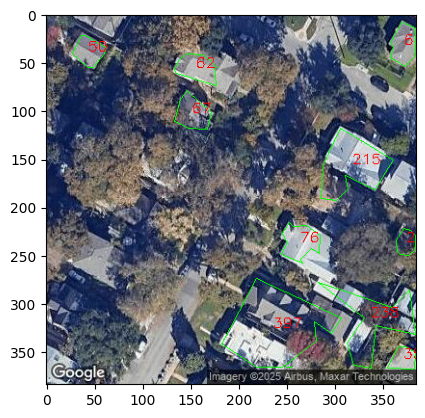

In [ ]:
import math
# Load the binary mask image
binary_mask = pred
area_list = []

# Check if the binary mask image is loaded correctly
if binary_mask is None:
    raise ValueError("Binary mask image not found at the specified path.")

# Convert binary mask to CV_8UC1 format
binary_mask = (binary_mask * 255).astype(np.uint8)

# Find contours of the white pixels
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Load the original image (assuming the same size as the binary mask)
original_image_path ='map_image.jpg'
original_image = cv2.imread(original_image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
original_image = resize(original_image,(384,384,3))

# Check if the original image is loaded correctly
if original_image is None:
    raise ValueError("Original image not found at the specified path.") 

# Ensure the original image is in the correct format for display
if len(original_image.shape) == 2:
    original_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)

# Draw polygons around the detected contours and calculate areas
for contour in contours:
    # Approximate the contour to reduce the number of points
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    cv2.drawContours(original_image, [approx], -1, (0, 255, 0), 1)
    
    # Calculate the area in pixel units
    pixel_area = cv2.contourArea(contour)
    area = math.ceil(pixel_area * 0.06643344927595204)
    area_list.append(pixel_area)

 # Calculate the centroid of the contour
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # Put a label near the centroid

    cv2.putText(original_image, str(area), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    
    # Print or store the area values as needed
    print(f"Pixel Area: {area}")
print(f"Total Pixel Area: {sum(area_list)}")
# Save the image with traced rooftops
# output_path = '_output_image.png'
# cv2.imwrite(output_path, original_image)

# Optionally, display the image with traced rooftops
# cv2.imshow('Detected Rooftops', original_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(original_image, cmap='gray')
plt.show()

Rooftop Stats - Total Area: 1, North-Facing Area: 0, Non-North-Facing Area: 1
Rooftop Stats - Total Area: 1, North-Facing Area: 0, Non-North-Facing Area: 1
Rooftop Stats - Total Area: 155, North-Facing Area: 85, Non-North-Facing Area: 70
Rooftop Stats - Total Area: 267, North-Facing Area: 152, Non-North-Facing Area: 115
Rooftop Stats - Total Area: 1, North-Facing Area: 1, Non-North-Facing Area: 1
Rooftop Stats - Total Area: 47, North-Facing Area: 25, Non-North-Facing Area: 23
Rooftop Stats - Total Area: 97, North-Facing Area: 51, Non-North-Facing Area: 46
Rooftop Stats - Total Area: 1, North-Facing Area: 0, Non-North-Facing Area: 1
Rooftop Stats - Total Area: 169, North-Facing Area: 84, Non-North-Facing Area: 86
Rooftop Stats - Total Area: 66, North-Facing Area: 29, Non-North-Facing Area: 37
Rooftop Stats - Total Area: 120, North-Facing Area: 65, Non-North-Facing Area: 56
Rooftop Stats - Total Area: 52, North-Facing Area: 28, Non-North-Facing Area: 24
Rooftop Stats - Total Area: 63, No

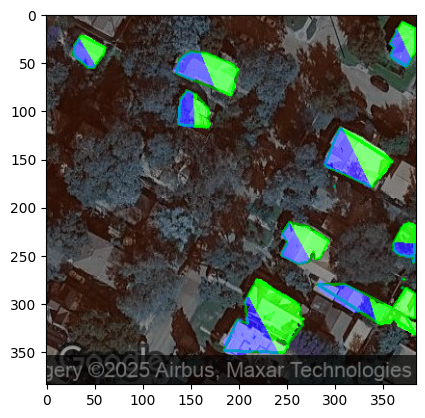

In [ ]:
import cv2
import numpy as np
import math

# Load the binary mask image
binary_mask = pred

# Check if the binary mask image is loaded correctly
if binary_mask is None:
    raise ValueError("Binary mask image not found at the specified path.")

# Convert binary mask to CV_8UC1 format
binary_mask = (binary_mask * 255).astype(np.uint8)

# Find contours of the rooftops
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Load the original image (assuming the same size as the binary mask)
original_image_path = 'map_image.jpg'
original_image = cv2.imread(original_image_path)

# Check if the original image is loaded correctly
if original_image is None:
    raise ValueError("Original image not found at the specified path.")

# Ensure the original image and sunlight mask have the same dimensions
height, width, channels = original_image.shape
sunlight_mask = np.zeros((height, width, 3), dtype=np.uint8)  # Create a 3-channel mask for shading

# Initialize area counters
rooftop_stats = []

# Process each rooftop contour
for contour in contours:
    
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    cv2.drawContours(original_image, [approx], -1, (0, 255, 0), 2)
    
    # Get the minimum area bounding rectangle
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int32(box)

    # Draw the bounding box on the original image
    # cv2.drawContours(original_image, [box], 0, (0, 255, 0), 2)

    # Calculate the center and angle of the building
    roof_angle = rect[2]
    if roof_angle < -45:
        roof_angle += 90
    center = (int(rect[0][0]), int(rect[0][1]))

    # Define the north-facing vector based on the building's orientation
    radians = math.radians(-roof_angle)
    north_vector = np.array([math.cos(radians), math.sin(radians)])

    # Create a binary mask of the rooftop
    mask = np.zeros(binary_mask.shape, dtype=np.uint8)
    cv2.drawContours(mask, [contour], -1, 255, -1)

    # Initialize areas
    total_area = 0
    north_facing_area = 0
    non_north_facing_area = 0

    # Iterate over each pixel within the contour
    for y in range(height):
        for x in range(width):
            if mask[y, x] == 255:  # Pixel belongs to the rooftop
                total_area += 1  # Count total area

                # Calculate the vector from the center to the pixel
                pixel_vector = np.array([x - center[0], y - center[1]])
                dot_product = np.dot(pixel_vector, north_vector)

                # Classify the pixel as north-facing or non-north-facing
                if dot_product > 0:
                    north_facing_area += 1
                    sunlight_mask[y, x] = (0, 255, 0)  # Green for north-facing
                else:
                    non_north_facing_area += 1
                    sunlight_mask[y, x] = (0, 0, 255)  # Red for non-north-facing

    total_area =  math.ceil(total_area * 0.06645539359399037)
    north_facing_area = math.ceil(north_facing_area * 0.06645539359399037)
    non_north_facing_area = math.ceil(non_north_facing_area * 0.06645539359399037)
    # Store the rooftop statistics
    rooftop_stats.append({
        "total_area": total_area,
        "north_facing_area":  north_facing_area,
        "non_north_facing_area": non_north_facing_area, 
    })

    # Print the areas for the current rooftop
    print(f"Rooftop Stats - Total Area: {total_area}, North-Facing Area: {north_facing_area}, Non-North-Facing Area: {non_north_facing_area}")

# Combine the original image with the sunlight mask
result_image = cv2.addWeighted(original_image, 0.6, sunlight_mask, 0.8, 0)


# Save the result image
# output_path = '_output_image_with_sunlight_shading_and_slopes.png'
# cv2.imwrite(output_path, result_image)

# Optionally, display the image
# cv2.imshow('Rooftops with Sunlight Shading and Slopes', result_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()




plt.imshow(result_image, cmap='gray')
plt.show()


In [7]:
def create_aggregated_mask(binary_mask, kernel_size, flood_fill=False):
    # Save the initial binary mask
    cv2.imwrite('binary_mask.png', binary_mask)

    # Create a kernel for morphological operations
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Apply morphological closing operation to fill small holes and aggregate mask
    aggregated_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
    cv2.imwrite('aggregated_mask_after_closing.png', aggregated_mask)

    # Apply morphological erosion to remove noise
    aggregated_mask = cv2.erode(aggregated_mask, kernel, iterations=1)
    cv2.imwrite('aggregated_mask_after_erosion.png', aggregated_mask)

    # Apply morphological dilation to enhance object boundaries
    aggregated_mask = cv2.dilate(aggregated_mask, kernel, iterations=1)
    cv2.imwrite('aggregated_mask_after_dilation.png', aggregated_mask)

    if flood_fill:
        # Create a mask for flood filling with a border of 2 pixels
        flood_fill_mask = np.zeros((aggregated_mask.shape[0] + 2, aggregated_mask.shape[1] + 2), np.uint8)

        # Flood fill the mask starting from a seed point
        cv2.floodFill(aggregated_mask, flood_fill_mask, (0, 0), 255)
        cv2.imwrite('aggregated_mask_after_flood_fill.png', aggregated_mask)

        # Invert the flood-filled mask
        inverted_flood_fill = cv2.bitwise_not(flood_fill_mask[1:-1, 1:-1])
        cv2.imwrite('inverted_flood_fill.png', inverted_flood_fill)

        # Ensure the dimensions match before combining
        aggregated_mask = cv2.resize(aggregated_mask, (inverted_flood_fill.shape[1], inverted_flood_fill.shape[0]))

        # Convert aggregated_mask to uint8
        aggregated_mask = aggregated_mask.astype(np.uint8)

        # Combine the aggregated mask with the flood-filled mask
        aggregated_mask = cv2.bitwise_or(aggregated_mask, inverted_flood_fill)
        cv2.imwrite('aggregated_mask_after_combining.png', aggregated_mask)

    


In [8]:
# Ensure mask is of type uint8
mask = mask.astype(np.uint8)

# Create the aggregated mask
kernel_size = 5
flood_fill = True

aggregated_mask = create_aggregated_mask(mask, kernel_size, flood_fill)
cv2.imwrite('aggregated_mask.png', aggregated_mask)


error: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


In [9]:
# Example usage
threshold_value = 125
kernel_size = 3
flood_fill = True

mask = create_aggregated_mask(mask, threshold_value, kernel_size, flood_fill)
cv2.imwrite('aggregated_mask.png', mask)

TypeError: create_aggregated_mask() takes from 2 to 3 positional arguments but 4 were given